In [213]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [214]:
df = pd.read_csv("../Dataset/diabetes_Missing_Data.csv")

In [215]:
df.head()


,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [217]:
df.duplicated().sum()

np.int64(0)

In [218]:
df.isnull().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

In [219]:
zero_missing = ['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold','Serum_Insulin', 'BMI', 'Diabetes_Pedigree', 'Age']

# Replace 0 with NaN only in those columns 
df[zero_missing] = df[zero_missing].replace(0, np.nan)

df.isnull().sum()

Pregnant             111
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

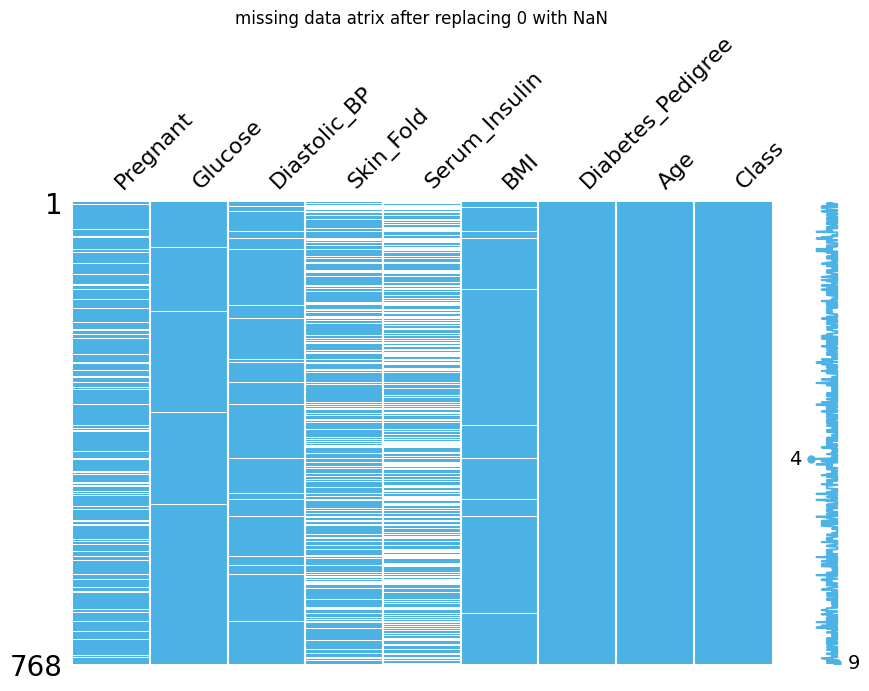

In [220]:
msno.matrix(df, figsize=(10,6), color=(0.3, 0.7, 0.9))
plt.title("missing data atrix after replacing 0 with NaN")
plt.show()

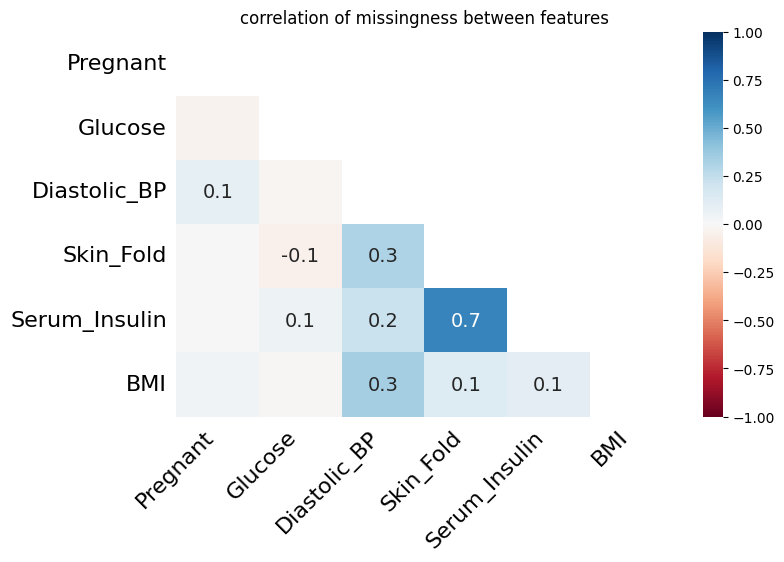

In [221]:


msno.heatmap(df, figsize=(8,5))
plt.title("correlation of missingness between features")
plt.show()

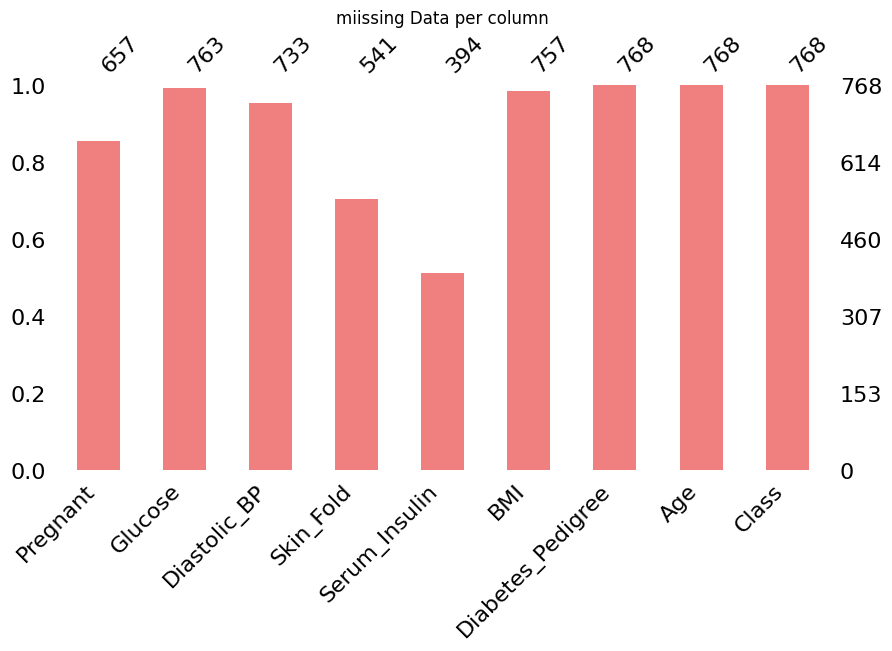

In [222]:
msno.bar(df, figsize=(10,5), color='lightcoral')
plt.title("miissing Data per column")
plt.show()


In [223]:
# 1Median Imputation for low-missing features
median_cols = ['Pregnant', 'Diastolic_BP', 'Skin_Fold', 'BMI', 'Glucose']
for col in median_cols:
    df[col].fillna(df[col].median(), inplace=True)
# KNN Imputation for high-missing features (like Serum_Insulin) for 5 nearst neighbors

imputer = KNNImputer(n_neighbors=5)
df[['Serum_Insulin']] = imputer.fit_transform(df[['Serum_Insulin']])
df.isnull().sum()

C:\Users\naols\AppData\Local\Temp\ipykernel_18880\14557448.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\naols\AppData\Local\Temp\ipykernel_18880\14557448.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

Pregnant             0
Glucose              0
Diastolic_BP         0
Skin_Fold            0
Serum_Insulin        0
BMI                  0
Diabetes_Pedigree    0
Age                  0
Class                0
dtype: int64

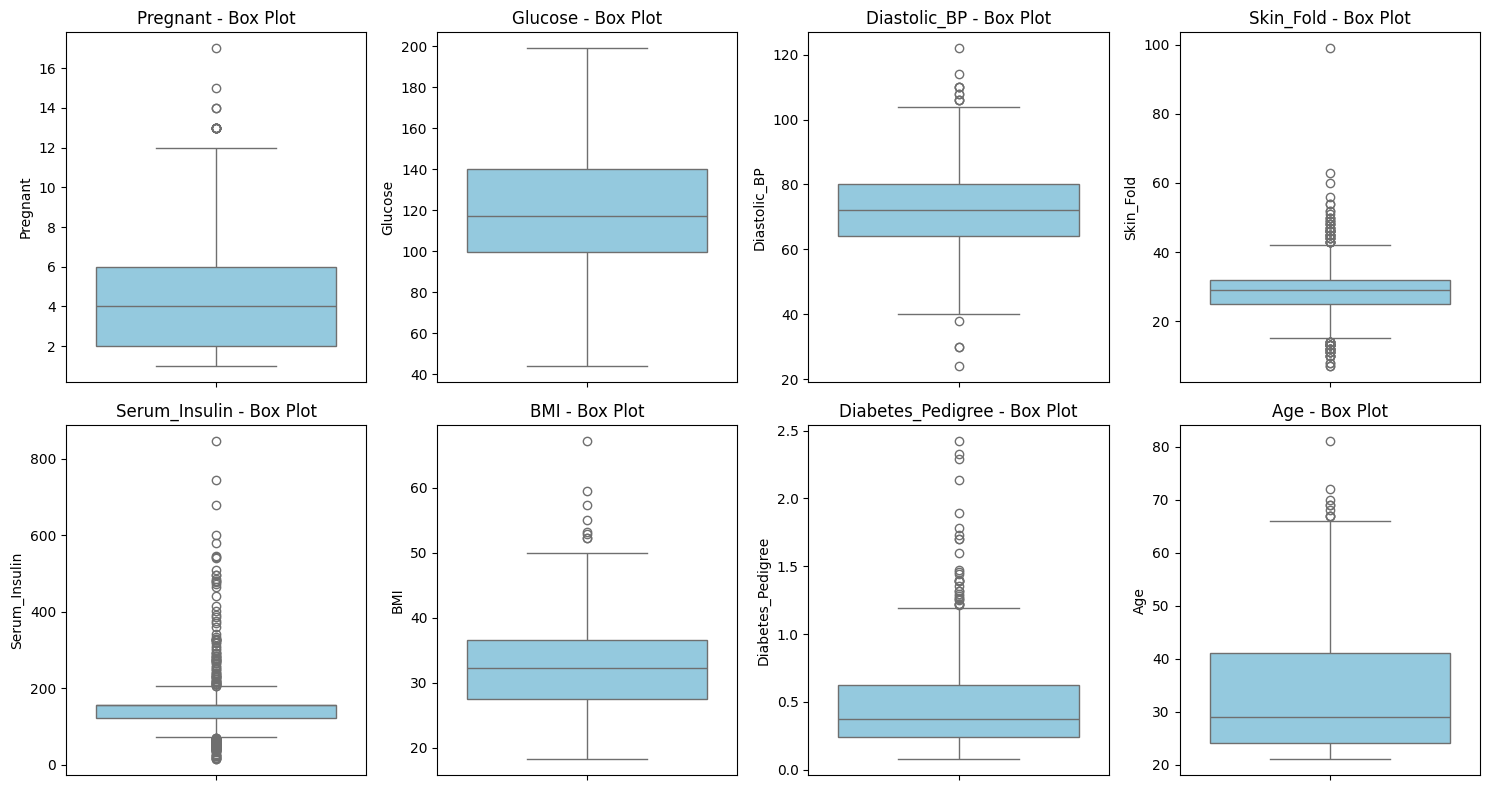

In [224]:
num_features = ['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold',
                'Serum_Insulin', 'BMI', 'Diabetes_Pedigree', 'Age']

plt.figure(figsize=(15, 8))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'{col} - Box Plot')
plt.tight_layout()
plt.show()

In [225]:
# Create Age Groups
bins_age = [0, 30, 50, 100]
labels_age = ['Young', 'Middle-aged', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age, right=False)

#  Create BMI Categories
bins_bmi = [0, 18.5, 24.9, 29.9, 100]
labels_bmi = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins_bmi, labels=labels_bmi, right=False)

# Create Glucose Level Categories
bins_glucose = [0, 99, 125, 200]
labels_glucose = ['Normal', 'Prediabetes', 'Diabetes']
df['Glucose_Category'] = pd.cut(df['Glucose'], bins=bins_glucose, labels=labels_glucose, right=False)

# Show the new columns
print(df[['Age', 'Age_Group', 'BMI', 'BMI_Category', 'Glucose', 'Glucose_Category']].head())

   Age    Age_Group   BMI BMI_Category  Glucose Glucose_Category
0   50       Senior  33.6        Obese    148.0         Diabetes
1   31  Middle-aged  26.6   Overweight     85.0           Normal
2   32  Middle-aged  23.3       Normal    183.0         Diabetes
3   21        Young  28.1   Overweight     89.0           Normal
4   33  Middle-aged  43.1        Obese    137.0         Diabetes


In [226]:
# Encoding Categorical Variables
ordinal_cols = ['Age_Group', 'BMI_Category']
label_encoders = {}

for col in ordinal_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # store encoder if needed later

nominal_cols = ['Glucose_Category']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)  # avoid dummy trap

print(df.head())

   Pregnant  Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin   BMI  \
0       6.0    148.0          72.0       35.0     155.548223  33.6   
1       1.0     85.0          66.0       29.0     155.548223  26.6   
2       8.0    183.0          64.0       29.0     155.548223  23.3   
3       1.0     89.0          66.0       23.0      94.000000  28.1   
4       4.0    137.0          40.0       35.0     168.000000  43.1   

   Diabetes_Pedigree  Age  Class  Age_Group  BMI_Category  \
0              0.627   50      1          1             1   
1              0.351   31      0          0             2   
2              0.672   32      1          0             0   
3              0.167   21      0          2             2   
4              2.288   33      1          0             1   

   Glucose_Category_Prediabetes  Glucose_Category_Diabetes  
0                         False                       True  
1                         False                      False  
2                         Fal

In [227]:
df.head()


,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class,Age_Group,BMI_Category,Glucose_Category_Prediabetes,Glucose_Category_Diabetes
0,6.0,148.0,72.0,35.0,155.548223,33.6,0.627,50,1,1,1,False,True
1,1.0,85.0,66.0,29.0,155.548223,26.6,0.351,31,0,0,2,False,False
2,8.0,183.0,64.0,29.0,155.548223,23.3,0.672,32,1,0,0,False,True
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21,0,2,2,False,False
4,4.0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1,0,1,False,True


In [228]:
df.isnull().sum()

Pregnant                        0
Glucose                         0
Diastolic_BP                    0
Skin_Fold                       0
Serum_Insulin                   0
BMI                             0
Diabetes_Pedigree               0
Age                             0
Class                           0
Age_Group                       0
BMI_Category                    0
Glucose_Category_Prediabetes    0
Glucose_Category_Diabetes       0
dtype: int64

In [229]:
numerical_features = ['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 
                      'Serum_Insulin', 'BMI', 'Diabetes_Pedigree', 'Age']

scaler_std = StandardScaler()
df_std_scaled = df.copy()
df_std_scaled[numerical_features] = scaler_std.fit_transform(df[numerical_features])

# Example comparison
print(df[numerical_features].head())
print(df_std_scaled[numerical_features].head())


   Pregnant  Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin   BMI  \
0       6.0    148.0          72.0       35.0     155.548223  33.6   
1       1.0     85.0          66.0       29.0     155.548223  26.6   
2       8.0    183.0          64.0       29.0     155.548223  23.3   
3       1.0     89.0          66.0       23.0      94.000000  28.1   
4       4.0    137.0          40.0       35.0     168.000000  43.1   

   Diabetes_Pedigree  Age  
0              0.627   50  
1              0.351   31  
2              0.672   32  
3              0.167   21  
4              2.288   33  
   Pregnant   Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin       BMI  \
0  0.529395  0.866045     -0.031990   0.670643  -3.345079e-16  0.166619   
1 -1.149280 -1.205066     -0.528319  -0.012301  -3.345079e-16 -0.852200   
2  1.200864  2.016662     -0.693761  -0.012301  -3.345079e-16 -1.332500   
3 -1.149280 -1.073567     -0.528319  -0.695245  -7.243887e-01 -0.633881   
4 -0.142075  0.504422     -2.679076 

In [230]:
scaler_mm = MinMaxScaler()
df_mm_scaled = df.copy()
df_mm_scaled[numerical_features] = scaler_mm.fit_transform(df[numerical_features])

# Example comparison
print(df[numerical_features].head())
print(df_mm_scaled[numerical_features].head())


   Pregnant  Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin   BMI  \
0       6.0    148.0          72.0       35.0     155.548223  33.6   
1       1.0     85.0          66.0       29.0     155.548223  26.6   
2       8.0    183.0          64.0       29.0     155.548223  23.3   
3       1.0     89.0          66.0       23.0      94.000000  28.1   
4       4.0    137.0          40.0       35.0     168.000000  43.1   

   Diabetes_Pedigree  Age  
0              0.627   50  
1              0.351   31  
2              0.672   32  
3              0.167   21  
4              2.288   33  
   Pregnant   Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin       BMI  \
0    0.3125  0.670968      0.489796   0.304348       0.170130  0.314928   
1    0.0000  0.264516      0.428571   0.239130       0.170130  0.171779   
2    0.4375  0.896774      0.408163   0.239130       0.170130  0.104294   
3    0.0000  0.290323      0.428571   0.173913       0.096154  0.202454   
4    0.1875  0.600000      0.163265 

In [231]:
df_scaled = df.copy()
df_scaled[numerical_features] = scaler_mm.fit_transform(df[numerical_features])


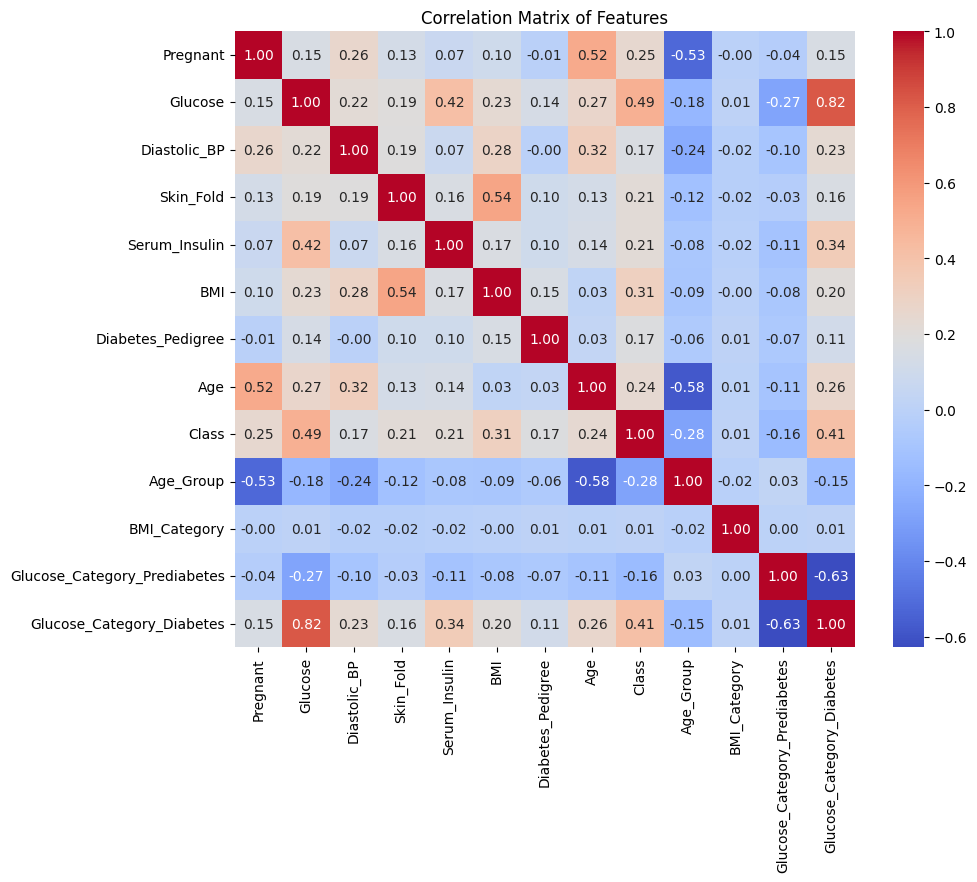

In [232]:
# Compute correlation matrix
corr_matrix = df_scaled.corr()  # assuming df_scaled has scaled numerical features

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

In [233]:

X = df_scaled[numerical_features]
y = df_scaled['Class']

# Apply SelectKBest
selector = SelectKBest(score_func=mutual_info_classif, k='all')  # all features for ranking
selector.fit(X, y)

# Create a DataFrame of scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print(feature_scores)


             Feature     Score
1            Glucose  0.109331
5                BMI  0.075183
4      Serum_Insulin  0.074127
7                Age  0.067840
0           Pregnant  0.061855
2       Diastolic_BP  0.015027
6  Diabetes_Pedigree  0.011326
3          Skin_Fold  0.003073


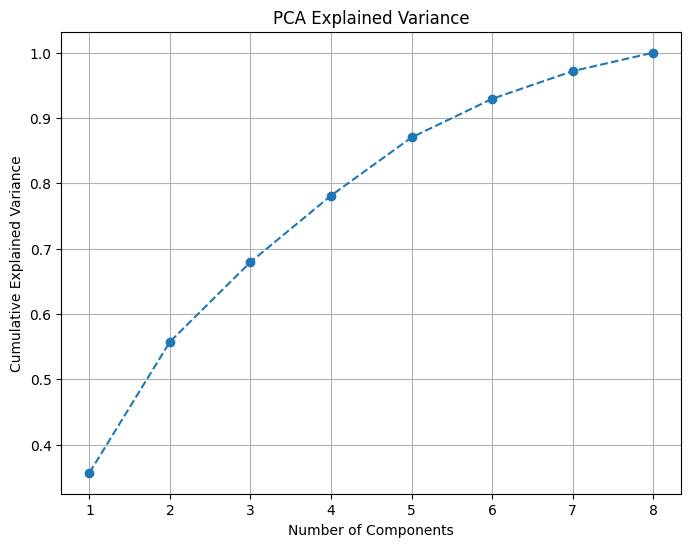

In [234]:
pca = PCA()
X_pca = pca.fit_transform(X)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot variance explained
plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()


In [235]:
# Find number of components for 90% variance
n_components_90 = np.argmax(cumulative_variance >= 0.9) + 1
print(f"Number of components to retain 90% variance: {n_components_90}")
pca_final = PCA(n_components=n_components_90)
X_reduced = pca_final.fit_transform(X)
print("Shape after PCA:", X_reduced.shape)


Number of components to retain 90% variance: 6
Shape after PCA: (768, 6)


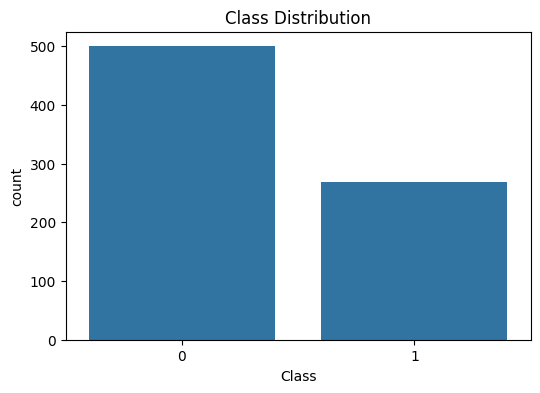

In [236]:
# Target variable
target = 'Class'

# Count plot
plt.figure(figsize=(6,4))
sns.countplot(x=target, data=df_scaled)
plt.title("Class Distribution")
plt.show()


In [237]:
class_counts = df_scaled[target].value_counts()
imbalance_ratio = class_counts.min() / class_counts.max()
print("Class Counts:\n", class_counts)
print(f" Ratio of (minority/majority): {imbalance_ratio:.2f}")


Class Counts:
 Class
0    500
1    268
Name: count, dtype: int64
 Ratio of (minority/majority): 0.54


In [238]:
X = df_scaled[numerical_features]
y = df_scaled[target]

# Split into train and test (do imbalance handling on training set only)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
# SMOTE is applied temporarily on training data to help models learn balanced classes; it does not increase the original dataset size.

# Check new class distribution
import pandas as pd
print(pd.Series(y_train_res).value_counts())


Class
0    400
1    400
Name: count, dtype: int64


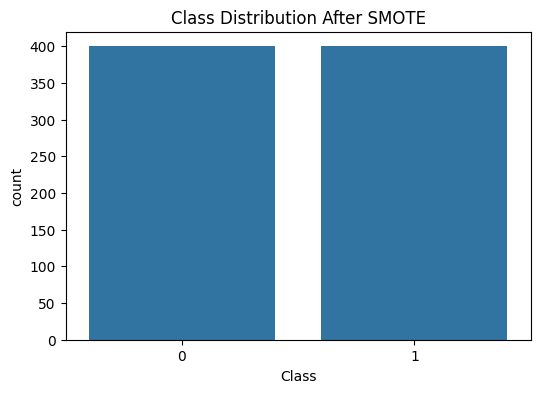

In [239]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_res)
plt.title("Class Distribution After SMOTE")
plt.show()


In [240]:

df.to_csv("../Dataset/Final_Clean_Dataset1.csv", index=False)
